<a href="https://colab.research.google.com/github/adrianaleticiamartinez/mcd_ML2/blob/main/Proyecto_Final_ML2_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumno: Adriana Leticia Martinez Estrada

# Clasificador de Financiamiento de Vivienda en la Ciudad de México utilizando XGBoost


En este Jupyter Notebook, desarrollaremos un clasificador usando el algoritmo XGBoost para predecir la aprobación de financiamientos para vivienda en la Ciudad de México. Este modelo se basará en datos socioeconómicos, demográficos y sobre las características de la vivienda de los solicitantes.

## Descripción del proceso:

1. **Carga de Datos:** Inicialmente, se cargan los datos desde un archivo CSV y se realiza un análisis exploratorio para comprender su estructura y contenido.
2. **Preprocesamiento:** Luego, se limpian y transforman los datos, preparándolos para el modelado.
3. **Modelado con XGBoost:** Con los datos preparados, procedemos a entrenar el modelo XGBoost.
4. **Evaluación del Modelo:** Una vez entrenado el modelo, evaluamos su rendimiento con métricas estándar de clasificación.
5. **Exportación del Modelo:** Finalmente, exportamos el modelo entrenado para su implementación en Google Cloud Platform.


## Código:

Importamos las librerías necesarias

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

### Carga de Datos / Análisis Exploratorio de Datos (EDA)

En esta sección, realizaremos un Análisis Exploratorio de Datos (EDA) de los sets de datos de financiamiento de vivienda para la Ciudad de México. El objetivo es comprender la estructura y las características de los datos, identificar posibles problemas como valores faltantes o atípicos, y descubrir patrones o relaciones iniciales.

El EDA se realiza a través de varios pasos clave:
- Carga de datos
- Vista general de los datos
- Estadísticas descriptivas
- Detección de valores faltantes
- Visualización de distribuciones y relaciones

Comenzamos cargando los datos y utilizando funciones básicas de `pandas` para obtener una primera impresión del conjunto de datos.

In [2]:
datos_SNIIV = pd.read_csv('https://github.com/adrianaleticiamartinez/mcd_ML2/raw/main/data/financiamientos_full_CDMX.csv')
datos_CNBV = pd.read_csv("https://github.com/adrianaleticiamartinez/mcd_ML2/raw/main/data/cnbv_full_CDMX.csv")


In [3]:
# Importamos las librerías necesarias para el análisis exploratorio
import pandas as pd

In [4]:
# Vista general de los primeros registros para entender qué datos tenemos
print(datos_SNIIV.head())

    año  mes  cve_ent           entidad  cve_mun       minicipio  organismo  \
0  2023    1        9  Ciudad de México      NaN  No distribuido          4   
1  2023    1        9  Ciudad de México      2.0    Azcapotzalco          1   
2  2023    1        9  Ciudad de México      2.0    Azcapotzalco          1   
3  2023    1        9  Ciudad de México      2.0    Azcapotzalco          1   
4  2023    1        9  Ciudad de México      2.0    Azcapotzalco          1   

   modalidad  destino  tipo  sexo  edad_rango  ingresos_rango  vivienda_valor  \
0          2      1.0     1   NaN         NaN             NaN             NaN   
1          1      2.0     2   1.0         NaN             1.0             4.0   
2          1      2.0     2   1.0         2.0             3.0             4.0   
3          1      2.0     2   1.0         2.0             4.0             5.0   
4          1      2.0     2   1.0         2.0             5.0             4.0   

   acciones       monto  
0         0 

In [5]:
# Vista general de los primeros registros para entender qué datos tenemos
print(datos_CNBV.head())

    año  mes  cve_ent           entidad  cve_mun     municipio  modalidad  \
0  2023    1        9  Ciudad de México        2  Azcapotzalco          1   
1  2023    1        9  Ciudad de México        2  Azcapotzalco          1   
2  2023    1        9  Ciudad de México        2  Azcapotzalco          1   
3  2023    1        9  Ciudad de México        2  Azcapotzalco          1   
4  2023    1        9  Ciudad de México        2  Azcapotzalco          1   

   linea_credito  esquema  intermediario_financiero  sexo  edad_rango  \
0              4      2.0                     40012   2.0         2.0   
1              4      5.0                     40042   1.0         2.0   
2              4      5.0                     40042   1.0         2.0   
3              4      5.0                     40042   2.0         2.0   
4              4      5.0                     40042   2.0         2.0   

   ingresos_rango  vivienda_valor  poblacion_indigena  zona    monto  acciones  
0               6

In [6]:
print(datos_SNIIV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   año             214637 non-null  int64  
 1   mes             214637 non-null  int64  
 2   cve_ent         214637 non-null  int64  
 3   entidad         214637 non-null  object 
 4   cve_mun         213818 non-null  float64
 5   minicipio       214637 non-null  object 
 6   organismo       214637 non-null  int64  
 7   modalidad       214637 non-null  int64  
 8   destino         211561 non-null  float64
 9   tipo            214637 non-null  int64  
 10  sexo            197663 non-null  float64
 11  edad_rango      188998 non-null  float64
 12  ingresos_rango  205924 non-null  float64
 13  vivienda_valor  175760 non-null  float64
 14  acciones        214637 non-null  int64  
 15  monto           214637 non-null  float64
dtypes: float64(7), int64(7), object(2)
memory usage: 26.2+ M

In [7]:
# Resumen de información para identificar tipos de datos y valores faltantes
print(datos_CNBV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93648 entries, 0 to 93647
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   año                       93648 non-null  int64  
 1   mes                       93648 non-null  int64  
 2   cve_ent                   93648 non-null  int64  
 3   entidad                   93648 non-null  object 
 4   cve_mun                   93648 non-null  int64  
 5   municipio                 93648 non-null  object 
 6   modalidad                 93648 non-null  int64  
 7   linea_credito             93648 non-null  int64  
 8   esquema                   86290 non-null  float64
 9   intermediario_financiero  93648 non-null  int64  
 10  sexo                      86290 non-null  float64
 11  edad_rango                86290 non-null  float64
 12  ingresos_rango            93648 non-null  int64  
 13  vivienda_valor            93648 non-null  int64  
 14  poblac

In [8]:
print(datos_SNIIV.isnull().sum())

año                   0
mes                   0
cve_ent               0
entidad               0
cve_mun             819
minicipio             0
organismo             0
modalidad             0
destino            3076
tipo                  0
sexo              16974
edad_rango        25639
ingresos_rango     8713
vivienda_valor    38877
acciones              0
monto                 0
dtype: int64


In [9]:
# Detección de valores faltantes
print(datos_CNBV.isnull().sum())

año                            0
mes                            0
cve_ent                        0
entidad                        0
cve_mun                        0
municipio                      0
modalidad                      0
linea_credito                  0
esquema                     7358
intermediario_financiero       0
sexo                        7358
edad_rango                  7358
ingresos_rango                 0
vivienda_valor                 0
poblacion_indigena             0
zona                           0
monto                          0
acciones                       0
dtype: int64


### Preprocesamiento

In [10]:
# Eliminar columnas innecesarias de los sets de datos de financiamientos y CNBV
# para poder unirlos posteriormente
datos_SNIIV = datos_SNIIV.drop(columns=['tipo', 'modalidad', 'destino'])
datos_CNBV = datos_CNBV.drop(columns=['zona', 'poblacion_indigena', 'modalidad', 'linea_credito', 'esquema'])

# Cambiar el nombre de la variable para compatibilidad (organismo a intermediario_financiero)
datos_SNIIV = datos_SNIIV.rename(columns={'organismo': 'intermediario_financiero'})
# Cambiar el nombre de la columna minicipio a municipio
datos_SNIIV = datos_SNIIV.rename(columns={'minicipio': 'municipio'})


# Unir los datasets
df = pd.concat([datos_SNIIV, datos_CNBV], ignore_index=True)

In [11]:
# Eliminar las columnas que no son necesarias en este caso eliminamos el año y el mes dado que no tienen reelevancia para nuestro modelo
#la clave de entidad se desestima ya que en todos los casos es 9 correspondiente a la Ciudad de México
df = df.drop(['año', 'mes', 'cve_ent', 'entidad', 'municipio'], axis=1)

# Mostrar las primeras filas del dataframe actualizado para verificar los cambios
print(df.head())


   cve_mun  intermediario_financiero  sexo  edad_rango  ingresos_rango  \
0      NaN                         4   NaN         NaN             NaN   
1      2.0                         1   1.0         NaN             1.0   
2      2.0                         1   1.0         2.0             3.0   
3      2.0                         1   1.0         2.0             4.0   
4      2.0                         1   1.0         2.0             5.0   

   vivienda_valor  acciones       monto  
0             NaN         0   629971.00  
1             4.0         1        0.00  
2             4.0         1  1451389.82  
3             5.0         1   528495.22  
4             4.0         1   598702.95  


In [12]:
#Completar registros con valores nulos
df.fillna(method='bfill', inplace=True)


In [13]:
# Creamos la una nueva columna que nos permita diferenciar de manera categórica si se otorgó el financiamiento basada en la columna de monto
df['financiamiento_otorgado'] = df['monto'].apply(lambda x: 0 if pd.isnull(x) or x == 0 else 1)

# Mostramos las primeras filas del DataFrame con la nueva columna
print(df.head())

   cve_mun  intermediario_financiero  sexo  edad_rango  ingresos_rango  \
0      2.0                         4   1.0         2.0             1.0   
1      2.0                         1   1.0         2.0             1.0   
2      2.0                         1   1.0         2.0             3.0   
3      2.0                         1   1.0         2.0             4.0   
4      2.0                         1   1.0         2.0             5.0   

   vivienda_valor  acciones       monto  financiamiento_otorgado  
0             4.0         0   629971.00                        1  
1             4.0         1        0.00                        0  
2             4.0         1  1451389.82                        1  
3             5.0         1   528495.22                        1  
4             4.0         1   598702.95                        1  


In [14]:
print(df.describe())

             cve_mun  intermediario_financiero           sexo     edad_rango  \
count  308285.000000             308285.000000  300927.000000  300927.000000   
mean        9.677535              12166.831854       1.456818       1.925985   
std         4.881718              18416.400675       0.498133       0.471059   
min         2.000000                  1.000000       1.000000       1.000000   
25%         5.000000                  1.000000       1.000000       2.000000   
50%        10.000000                  2.000000       1.000000       2.000000   
75%        14.000000              40012.000000       2.000000       2.000000   
max        17.000000              40307.000000       2.000000       3.000000   

       ingresos_rango  vivienda_valor       acciones         monto  \
count   308285.000000   308285.000000  308285.000000  3.082850e+05   
mean         4.147675        3.722857       5.005946  2.411804e+06   
std          1.773660        1.670106      61.881488  8.074894e+06   

#### Visualización de Distribuciones y Relaciones



In [15]:
#Importamos librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Configuraciones para la visualización
sns.set(style="whitegrid")  # Estilo de los gráficos
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

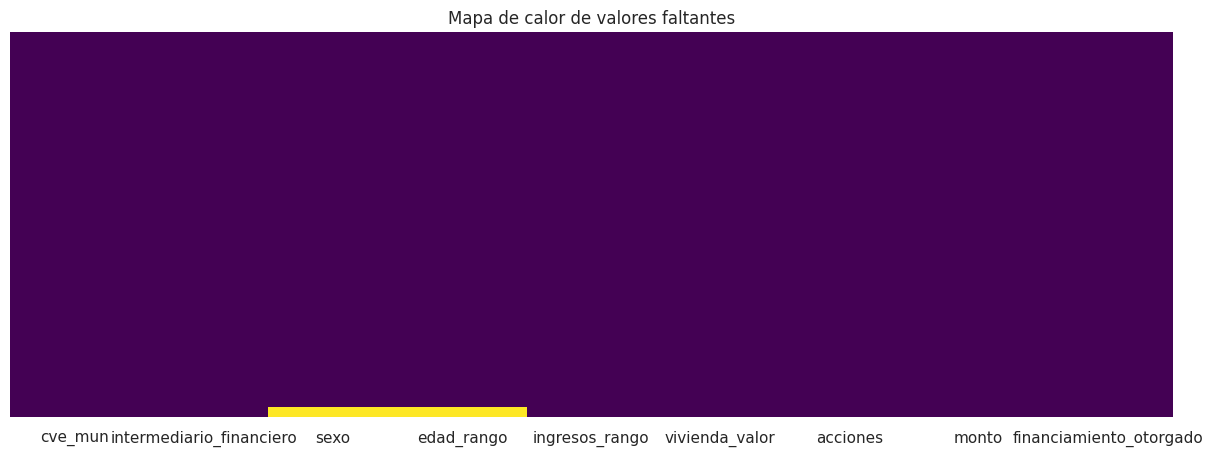

In [17]:
# Empezamos con un análisis de valores faltantes
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

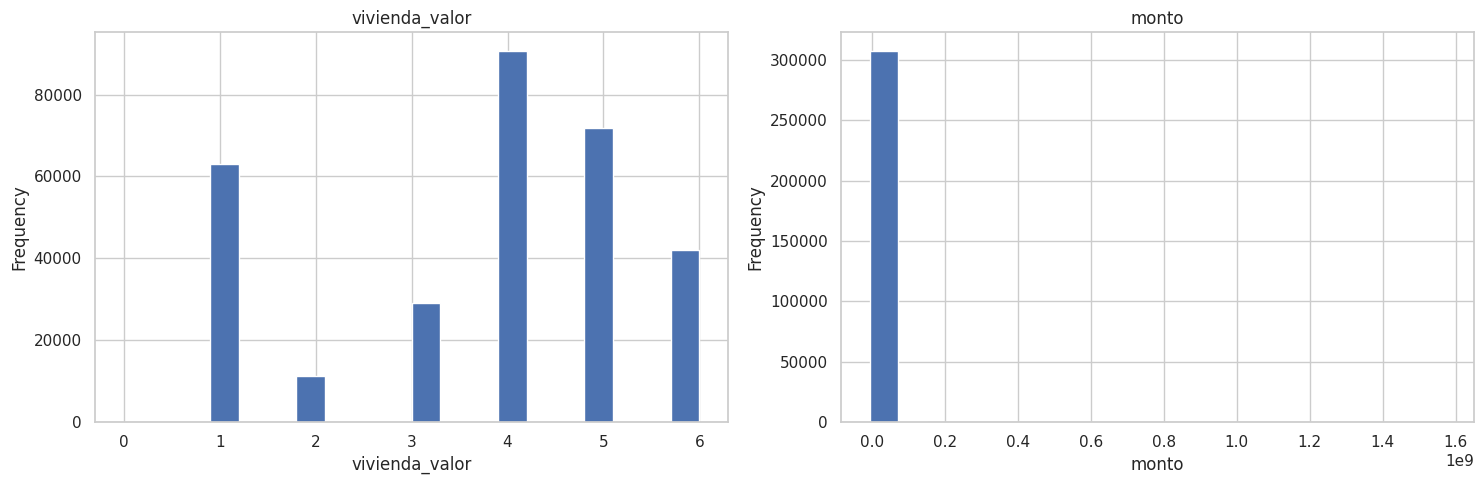

In [18]:
# Exploramos la distribución de algunas variables numéricas clave
plt.figure(figsize=(15, 5))
features = [ 'vivienda_valor', 'monto']
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    df[feature].plot(kind='hist', bins=20, title=feature)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


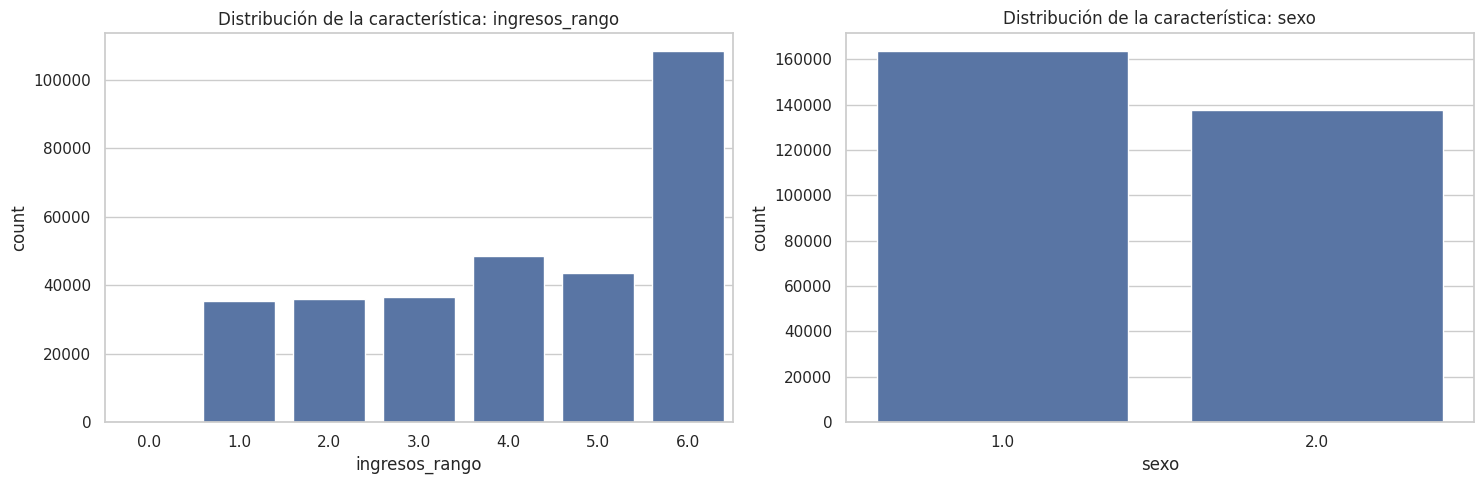

In [19]:
# Y la distribución de algunas variables categóricas
categorical_features = ['ingresos_rango','sexo']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=ax[i])
    ax[i].set_title(f'Distribución de la característica: {feature}')
plt.tight_layout()
plt.show()


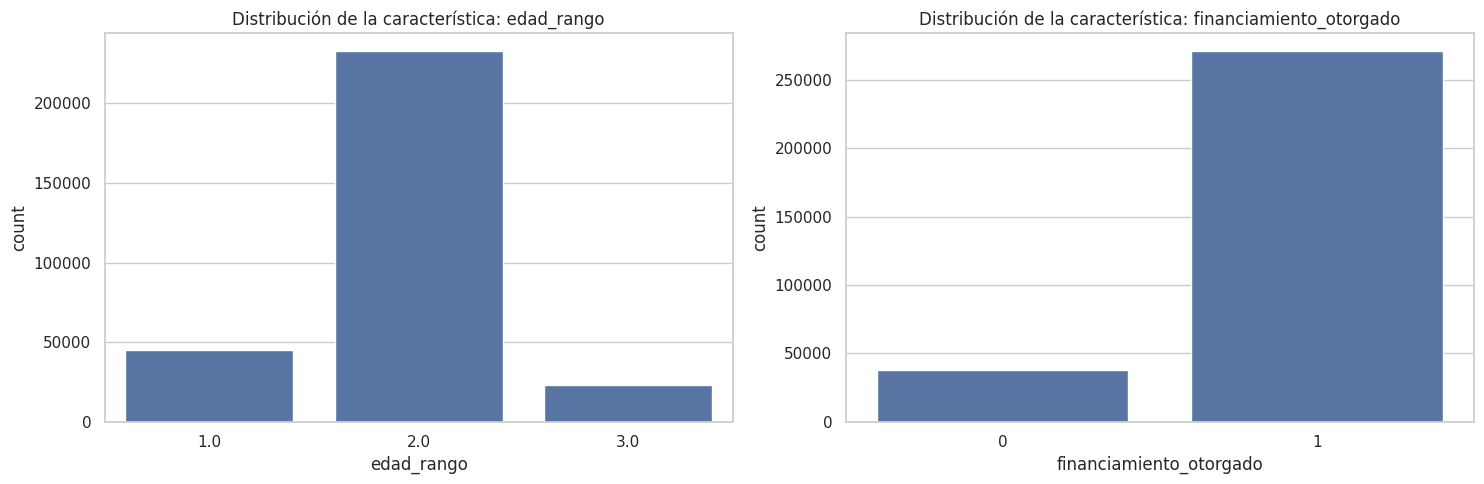

In [20]:
categorical_features = [ 'edad_rango', 'financiamiento_otorgado']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=ax[i])
    ax[i].set_title(f'Distribución de la característica: {feature}')
plt.tight_layout()
plt.show()

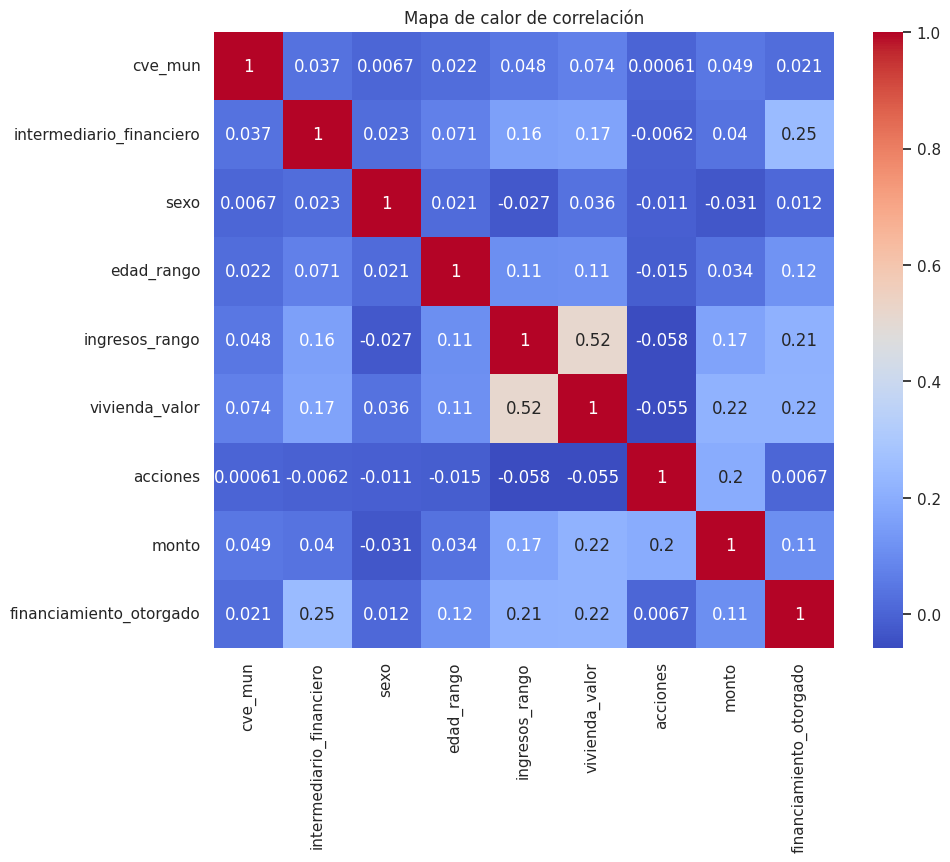

In [21]:
# Ahora, visualizamos la correlación entre las características numéricas
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

In [22]:
#Eliminamos variable monto para evitar el sesgo/sobreajuste en el modelo
df = df.drop(columns=['monto'])


### XGBoost para la Predicción de Financiamiento de Vivienda

Vamos a desarrollar un modelo de clasificación utilizando el algoritmo XGBoost. XGBoost es una implementación de árboles de decisión con boosting que ha demostrado ser muy efectiva en una amplia variedad de problemas de aprendizaje automático.

El proceso seguirá los siguientes pasos:
1. Preprocesamiento de datos.
2. División del conjunto de datos en entrenamiento y prueba.
3. Entrenamiento del modelo XGBoost.
4. Evaluación del modelo.
5. Afinación de hiperparámetros (si es necesario).
6. Exportación del modelo para su uso futuro.


In [23]:
# Importar librerías necesarias
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [24]:
# Codificar variables categóricas con LabelEncoder
categorical_vars = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_vars:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [25]:
# Normalización de variables numéricas con StandardScaler
#numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
#scaler = StandardScaler()
#df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

In [26]:
# Sección 2: División en conjuntos de entrenamiento y prueba
X = df.drop('financiamiento_otorgado', axis=1)
y = df['financiamiento_otorgado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


In [27]:
print(X.head())

   cve_mun  intermediario_financiero  sexo  edad_rango  ingresos_rango  \
0      2.0                         4   1.0         2.0             1.0   
1      2.0                         1   1.0         2.0             1.0   
2      2.0                         1   1.0         2.0             3.0   
3      2.0                         1   1.0         2.0             4.0   
4      2.0                         1   1.0         2.0             5.0   

   vivienda_valor  acciones  
0             4.0         0  
1             4.0         1  
2             4.0         1  
3             5.0         1  
4             4.0         1  


In [28]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_encoded = label_encoder.fit_transform(y)


In [29]:
# Sección 3: Entrenamiento del modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Evaluación del modelo

In [30]:
# Sección 4: Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))
print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred)}')

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     11246
           1       0.95      0.97      0.96     81240

    accuracy                           0.93     92486
   macro avg       0.85      0.81      0.83     92486
weighted avg       0.93      0.93      0.93     92486

Accuracy: 0.9309192742685379


Prueba invocación modelo

In [31]:
# Suponiendo que ya tienes un modelo entrenado llamado 'model'
# y que los encoders y scalers han sido guardados como 'label_encoders' y 'scaler' respectivamente.

# Ejemplo de datos de entrada para un caso puntual
data_puntual = {
    'cve_mun': 3.0,
    'intermediario_financiero': 40012,
    'sexo': 2.0,
    'edad_rango': 2.0,
    'ingresos_rango': 6.0,
    'vivienda_valor': 4.0,
    'acciones': 1
}

# Convertimos el diccionario a un DataFrame para simular un caso real
input_data = pd.DataFrame([data_puntual])

# Realizamos la codificación y escalado como en los datos de entrenamiento
for col, encoder in label_encoders.items():
    if col in input_data.columns:
        input_data[col] = encoder.transform(input_data[col])

# Hacemos la predicción utilizando el modelo
predicted_class = model.predict(input_data)
print(f"La clase predicha para el caso puntual es: {predicted_class[0]}")

# Si el modelo predice probabilidades, también podemos mostrarlas
predicted_prob = model.predict_proba(input_data)
print(f"Probabilidad de pertenecer a cada clase: {predicted_prob[0]}")


La clase predicha para el caso puntual es: 1
Probabilidad de pertenecer a cada clase: [3.3378601e-06 9.9999666e-01]


### Exportar Modelo

In [33]:
import pickle
# save
pickle.dump(model, open('xgboost_model.pkl', "wb"))
